In [10]:
import numpy                as     np
from sklearn                import datasets
import pandas               as     pd
from sklearn.decomposition  import PCA
from sklearn.preprocessing  import StandardScaler
from sklearn.cluster        import KMeans
from scipy.stats            import zscore
from IPython.utils          import io
from sklearn.metrics        import silhouette_score


import matplotlib.pyplot    as     plt
import seaborn              as     sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#with io.capture_output() as captured:

In [11]:
#datasets.load*?

In [12]:
def sklearn_to_df(sklearn_dataset):
    df            = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target']  = pd.Series(sklearn_dataset.target)
    return df

In [48]:
#df        = sklearn_to_df(datasets.load_wine())
df = pd.read_pickle('output/load_wine/03 Feature_Selection_load_wine')
X         = df.drop('target',axis = 1)
y         = df['target']
#X_scaled = pd.DataFrame(StandardScaler().fit_transform(X))
X_scaled  = X.apply(zscore) 

In [49]:
X_scaled.describe().round(2)

,alcohol,alcalinity_of_ash,nonflavanoid_phenols,proanthocyanins,hue,proline
count,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.00,-0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.43,-2.67,-1.87,-2.07,-2.09,-1.49
25%,-0.79,-0.69,-0.74,-0.60,-0.77,-0.78
50%,0.06,0.00,-0.18,-0.06,0.03,-0.23
75%,0.84,0.60,0.61,0.63,0.71,0.76
max,2.26,3.15,2.40,3.49,3.30,2.97


### PCA

array([0.4112577 , 0.61918516, 0.74938286, 0.86733995, 0.95295863])

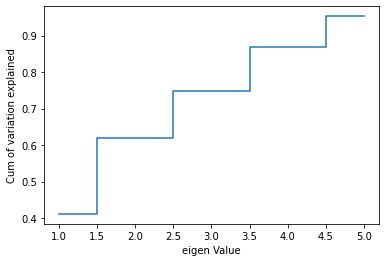

In [50]:
pca  = PCA(n_components = 5)
X_pca = pd.DataFrame(pca.fit_transform(X_scaled))
np.cumsum(pca.explained_variance_ratio_)

with io.capture_output() as captured:
    plt.step(list(range(1,6)),np.cumsum(pca.explained_variance_ratio_), where='mid')
    plt.ylabel('Cum of variation explained')
    plt.xlabel('eigen Value')
plt.show()

In [51]:
X_pca = pd.concat([X_pca,y],axis = 1)
X_pca.corr().round(2)
X_pca.to_pickle('output/load_wine/04 PCA_5')


,0,1,2,3,4,target
0,1.00,0.00,-0.00,0.00,0.00,-0.79
1,0.00,1.00,-0.00,0.00,0.00,-0.22
2,-0.00,-0.00,1.00,0.00,0.00,-0.08
3,0.00,0.00,0.00,1.00,0.00,-0.16
4,0.00,0.00,0.00,0.00,1.00,-0.07
target,-0.79,-0.22,-0.08,-0.16,-0.07,1.00


### K Means

In [52]:
#X_scaled = Xpca

In [54]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_scaled)

X_scaled['kmean_clust'] = kmeans.labels_
X_kmean = pd.concat([X_scaled,y],axis = 1)
X_kmean.corr().round(2)
X_kmean.to_pickle('output/load_wine/04 Kmeans_3')

In [55]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(Xpca)

X_scaled['kmean_clust'] = kmeans.labels_
X_kmean = pd.concat([Xpca,y],axis = 1)
X_kmean.corr().round(2)
X_kmean.to_pickle('output/load_wine/04 Kmeans3_pca5')

KMeans(n_clusters=3)

,0,1,2,3,4,labels,kmean_clust,target
0,1.00,0.00,-0.00,0.00,0.00,0.11,0.59,-0.79
1,0.00,1.00,-0.00,0.00,0.00,0.41,-0.61,-0.22
2,-0.00,-0.00,1.00,0.00,0.00,-0.28,0.01,-0.08
3,0.00,0.00,0.00,1.00,0.00,-0.06,0.08,-0.16
4,0.00,0.00,0.00,0.00,1.00,-0.32,0.05,-0.07
labels,0.11,0.41,-0.28,-0.06,-0.32,1.00,-0.21,-0.02
kmean_clust,0.59,-0.61,0.01,0.08,0.05,-0.21,1.00,-0.48
target,-0.79,-0.22,-0.08,-0.16,-0.07,-0.02,-0.48,1.00


Clusters 2 Silhoutte coeff. 0.3161
Clusters 3 Silhoutte coeff. 0.3094
Clusters 4 Silhoutte coeff. 0.2857
Clusters 5 Silhoutte coeff. 0.2590
Clusters 6 Silhoutte coeff. 0.2596
Clusters 7 Silhoutte coeff. 0.1960
Clusters 8 Silhoutte coeff. 0.1873
Clusters 9 Silhoutte coeff. 0.1891


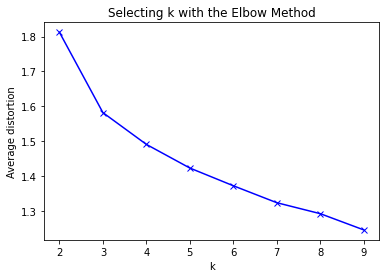

In [31]:
from sklearn.metrics import silhouette_score

#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(2,10)
meanDistortions=[]

#with io.capture_output() as captured:

for k in clusters:
    with io.capture_output() as captured:
        model=KMeans(n_clusters=k)
        model.fit(X_scaled)
        prediction=model.predict(X_scaled)
        meanDistortions.append(sum(np.min(cdist(X_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])
    print('Clusters {} Silhoutte coeff. {:.4f}'.format(k,silhouette_score(X_scaled,model.labels_)))

with io.capture_output() as captured:
    plt.plot(clusters, meanDistortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Average distortion')
    plt.title('Selecting k with the Elbow Method')
plt.show()

In [32]:
from sklearn.cluster import AgglomerativeClustering 

model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

model.fit(X_scaled)

X_scaled['labels'] = model.labels_
X_scaled.head(2)

#custDataAttr.groupby(["labels"]).count()

AgglomerativeClustering(linkage='average', n_clusters=3)

,0,1,2,3,4,labels
0,2.453834,-0.478830,-0.308884,0.080246,-0.413800,0
1,1.943895,-0.210087,1.821981,-0.861821,-0.556337,0


In [33]:
X_Clust = X_scaled.groupby(['labels'])

X_Clust.mean()

,0,1,2,3,4
labels,,,,,
0,-0.036278,-0.112414,0.051320,0.004037,0.050821
1,-1.031879,3.617174,0.826279,2.380812,-0.146803
2,0.895352,1.922608,-1.187425,-0.382892,-1.055245


Cophenet  0.7299910525429166


<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Agglomerative Hierarchical Clustering Dendogram')

Text(0.5, 0, 'sample index')

Text(0, 0.5, 'Distance')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [30.0, 30.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [185.0, 185.0, 195.0, 195.0],
  [162.5, 162.5, 190.0, 190.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [325.0, 325.0, 335.0, 335.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [385.0, 385.0, 395.0, 395.0],
  [375.0, 375.0, 390.0, 390.0],
  [352.5, 352.5, 382.5, 382.5],
  [330.0, 330.0, 367.5, 367.5],
  [315.0, 315.0, 348.75, 348.75],
  [292.5, 292.5, 331.875, 331.875],
  [275.0, 275.0, 312.1875, 312.1875],
  [243.75, 243.7

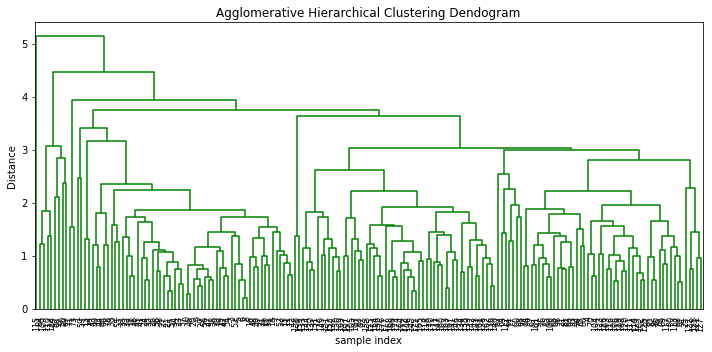

In [34]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

from scipy.spatial.distance import pdist  #Pairwise distribution between data points

# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(X_scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(X_scaled))

print('Cophenet ',c)

plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()